# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [281]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [282]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [284]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/DSML/Project/FoodHub/foodhub_order.csv')
# returns the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [285]:
# Saving the original data
df = data.copy()

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [286]:
df.shape

(1898, 9)

#### Observations:
*   The dataset has 1,898 rows and 9 columns.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*   All coulmns has 1,898 rows, so there are no null values in any column.
*   rating column has object datatype, we might have to change this to float

In [288]:
# Checking the unique values in the rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [289]:
# Replacing the string "Not given" to 0
df['rating'] = df['rating'].replace(['Not given'],0)

In [290]:
# Chaning the data type of rating, columns order_id and customer_id
df = df.astype({"rating": float, "order_id": object, "customer_id": object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [291]:
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
*   There are no missing values in any of the columns, hence no treatment required.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [292]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1898.0,2.659642,2.195280,0.00,0.00,4.00,5.0000,5.00
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:
*   Minimum time taken for food to be prepared once an order is placed: 20 mins
*   Average time taken for food to be prepared once an order is placed: 27.37 mins
*   Maximum time taken for food to be prepared once an order is placed: 35 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [293]:
df['rating'].value_counts(dropna=False)

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

#### Observations:
"Not given" was replaced by 0, hence 736 orders were not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [294]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(10, 5), bins="auto"):
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='blue')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='r', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

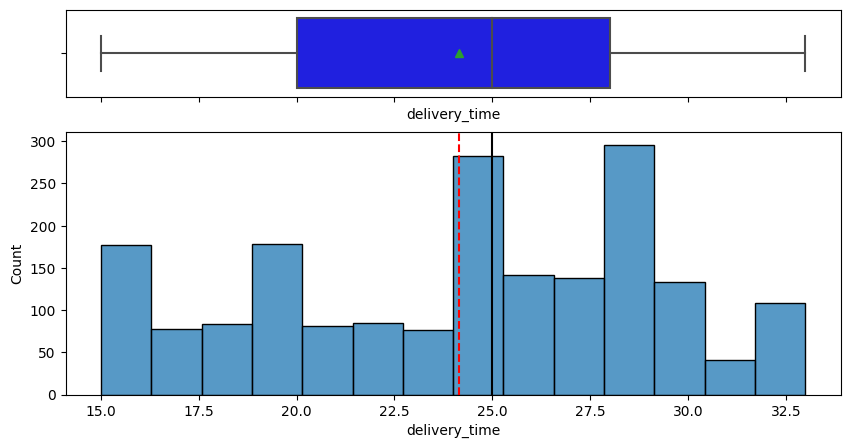

In [295]:
# Delivery Time
histogram_boxplot(df.delivery_time)

#### Observations:
*   Median delivery time is 25 mins
*   Most of the orders take 25 mins to 28 mins to be delivered

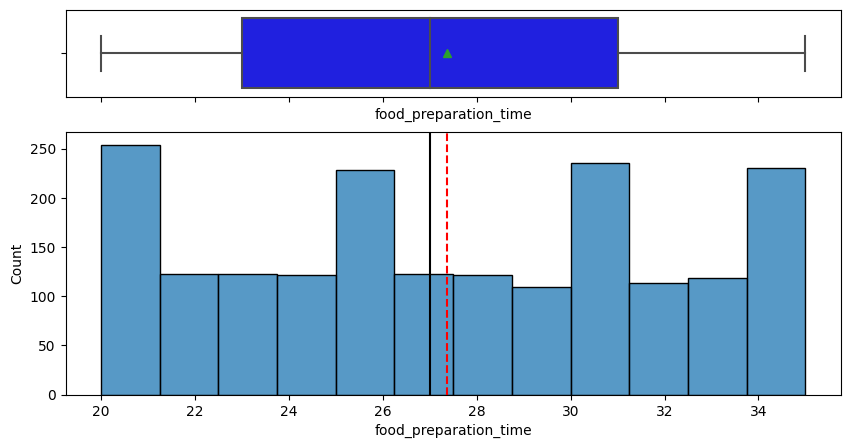

In [296]:
# Food preparation Time
histogram_boxplot(df.food_preparation_time)

#### Observations:
*   Median is about 27 mins
*   Even distribution, max = 36 mins and min = 20 mins

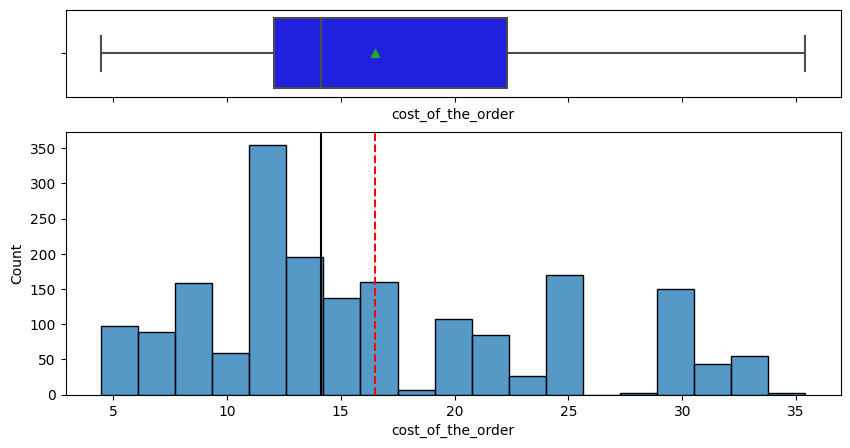

In [297]:
# Cost of the order
histogram_boxplot(df.cost_of_the_order)

#### Observations:
*   Median cost of the order is around 14
*   The number of orders are more in the lower cost range.

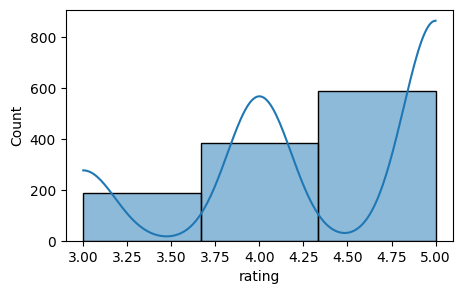

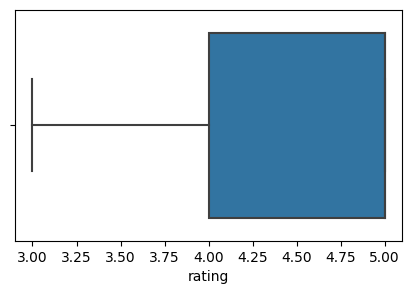

In [298]:
#rating, without the orders that are not rated
ratingdf = df[df['rating']!= 0]
plt.figure(figsize=(5, 3))
sns.histplot(data = ratingdf, x='rating',bins = 3,stat = 'count',kde = True)
plt.show()
plt.figure(figsize=(5, 3))
sns.boxplot(data = ratingdf, x='rating')
plt.show();

#### Observations:
*  Ratings are mostly around the maximum rating
*  Box plot is heavily skewed towards the left


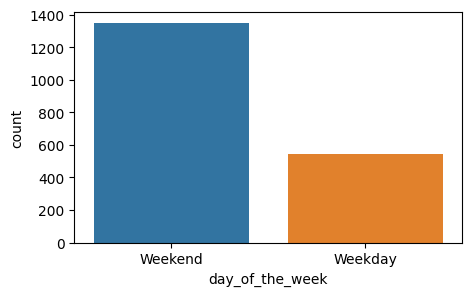

In [299]:
# Day of the week
plt.figure(figsize=(5, 3))
sns.countplot(data=df,x='day_of_the_week')
plt.show()

#### Observations:
Most of the orders come over the weekends

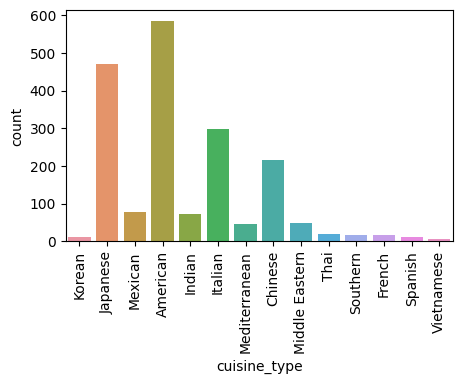

In [300]:
# Cuisine Type
plt.figure(figsize=(5, 3))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
*   American cuisine is ordered the most, followed by Japanese,Italian and Chinese
*   Vietnamese and Korean cuisines are ordered the least.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [301]:
# Top 5 restaurants by the orders received
df[['restaurant_name', 'order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id', axis = 0, ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
*   Shake Shack is on the top with 219 orders, followed by The Meatball Shop and Blue Ribbon Sushi is second and third spot respectively.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [302]:
# Most popular cuisine
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id', axis = 0, ascending=False).head(5)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations:

*   Most popular cuisine on weekends is American with 415 orders
*   Japanese is second with 335 orders


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [303]:
# Total number of orders
TotalOrders = df['cost_of_the_order'].count()

# Orders that cost more then 20 dollars
OrdersCostGT20 = df['cost_of_the_order'][df['cost_of_the_order']>20].count()

# Percentage
Percentage_GT20 = round((OrdersCostGT20/TotalOrders)*100,2)
Percentage_GT20

29.24

#### Observations:
29.24% of orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [304]:
# Mean delivery time
round(df['delivery_time'].mean(),2)

24.16

#### Observations:
Mean delivery time is 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [305]:
# Top 3 customers by the orders
df[['customer_id', 'order_id']].groupby('customer_id').count().sort_values(by = 'order_id', axis = 0, ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The top 3 customer ids are 52832, 47440 and 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


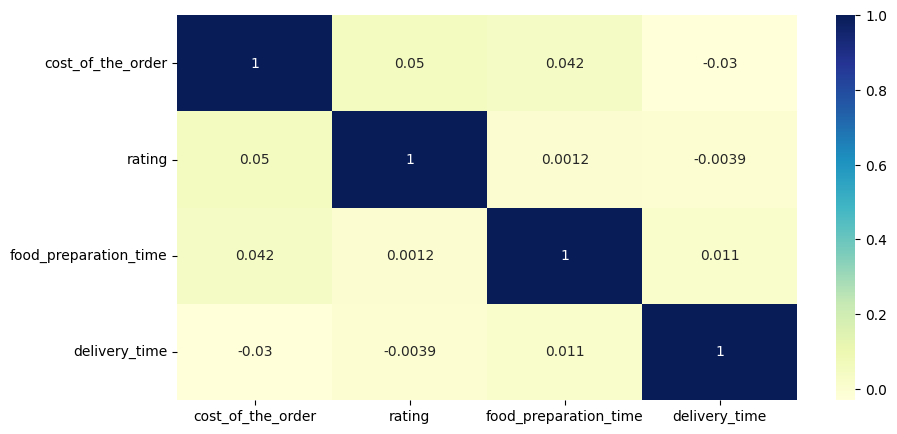

In [306]:
# Heat map
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

####Observations
*   No strong correlation between variables

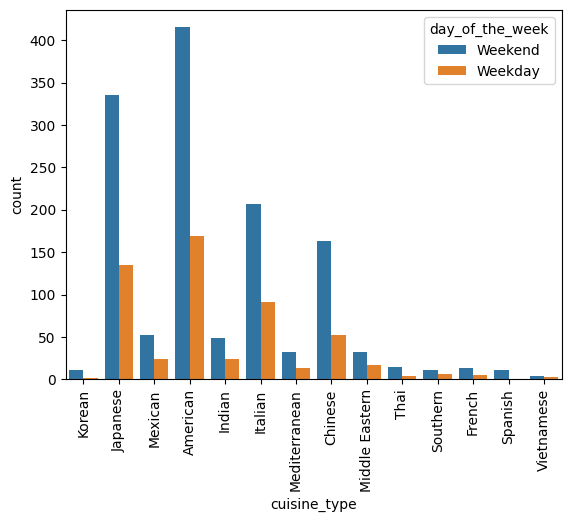

In [307]:
# Cuisine type by the day of the week
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

####Observations
*   Both during weekdays or weekends American cuisine is ordered the most followed by Japanese

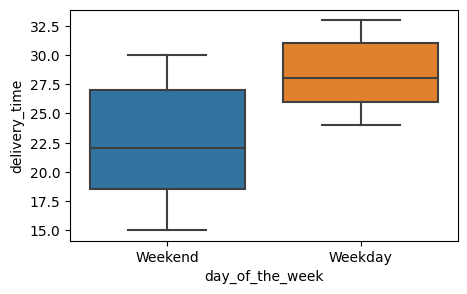

In [308]:
# Delivery time and Day of the week
plt.figure(figsize = (5, 3))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.ylabel('delivery_time')
plt.xlabel('day_of_the_week')
plt.show()

####Observations
*   Weekdays takes longer time to deliver

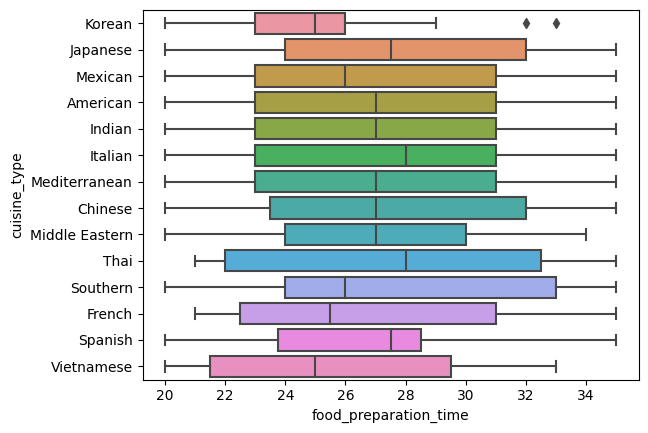

In [309]:
# Food preparation time and cuisine type
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show()


####Observations
Most of the cuisine types take around the same preapartion time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [314]:
# Mean rating greater than 4
Mean_Rating = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean() > 4
Mean_Rating.reset_index(inplace=True)

# Count of rating greater than 50
Count_Rating = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count() > 50
Count_Rating.reset_index(inplace=True)

# Using merge
Restaurants_PO = pd.merge(Mean_Rating[Mean_Rating['rating']== True], Count_Rating[Count_Rating['rating']== True],on ='restaurant_name')
Restaurants_PO

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:
Only 4 restaurants qualify for the promotional offer based the criteria

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [315]:
df5 = df
# Let revenue = 0
revenue = 0
# Let income = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(df5['cost_of_the_order'])
# Loop through the series to calculate the income and revenue
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income
print('Net revenue generated by the company: ',round(revenue,2))

Net revenue generated by the company:  6166.3


#### Observations:
The company's net revenue from the orders: 6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [317]:
# Total time
Totaltime = df.copy()
Totaltime['total_time'] = Totaltime['food_preparation_time']+Totaltime['delivery_time']

# Total count of orders
total_observations = Totaltime['total_time'].count()
# Orders with total time > 60
ordertime_GT60 = Totaltime['total_time'][Totaltime['total_time']> 60].count()
# Percentage of orders with total time > 60
percent_GT60 = round((ordertime_GT60/total_observations)*100,2)
percent_GT60

10.54

#### Observations:
10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [313]:
# Delivery time of the orders on Weekdays and Weekends
DeliveryTime= df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
DeliveryTime

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:
The mean delivery time on Weekdays is 28.34 mins and on the Weekends is 22.47 mins, even though the number of orders are more on the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are couple cuisine types that are very popular irrespective of the day of the week
*   Mostly the customers are satisfied with the service as the rating is very high.
*  The Median cost of the order is around 14



### Recommendations:

*  Focus on improving the orders on Weekdays, maybe by giving promotional offers on the weekdays
*  Have all customers provide the ratings, so that customer satisfaction can be measured correctly.
*  Try to minimise the delivery time on weekdays



---